In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
data=pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
data.info(
)

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split
x=data.drop(["median_house_value"],axis=1)
y=data["median_house_value"]

In [8]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [9]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

In [10]:
train_data= x_train.join(y_train)

In [11]:
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14782,-117.09,32.57,17.0,444.0,83.0,357.0,87.0,5.1478,NEAR OCEAN,138900.0
3332,-122.60,38.90,23.0,292.0,56.0,92.0,41.0,2.9583,INLAND,91700.0
16922,-122.33,37.58,27.0,5144.0,1481.0,2518.0,1447.0,3.4836,NEAR OCEAN,287900.0
4789,-118.32,34.02,47.0,1648.0,346.0,1120.0,338.0,2.0042,<1H OCEAN,114200.0
104,-122.26,37.81,34.0,5871.0,1914.0,2689.0,1789.0,2.8406,NEAR BAY,335700.0
...,...,...,...,...,...,...,...,...,...,...
7106,-118.01,33.90,26.0,2968.0,674.0,1655.0,628.0,4.6094,<1H OCEAN,201000.0
12649,-121.47,38.51,52.0,20.0,4.0,74.0,9.0,3.6250,INLAND,80000.0
8128,-118.16,33.79,25.0,5463.0,1265.0,3010.0,1179.0,3.2330,NEAR OCEAN,199100.0
13408,-117.48,34.09,32.0,1650.0,328.0,1124.0,290.0,3.1838,INLAND,98600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

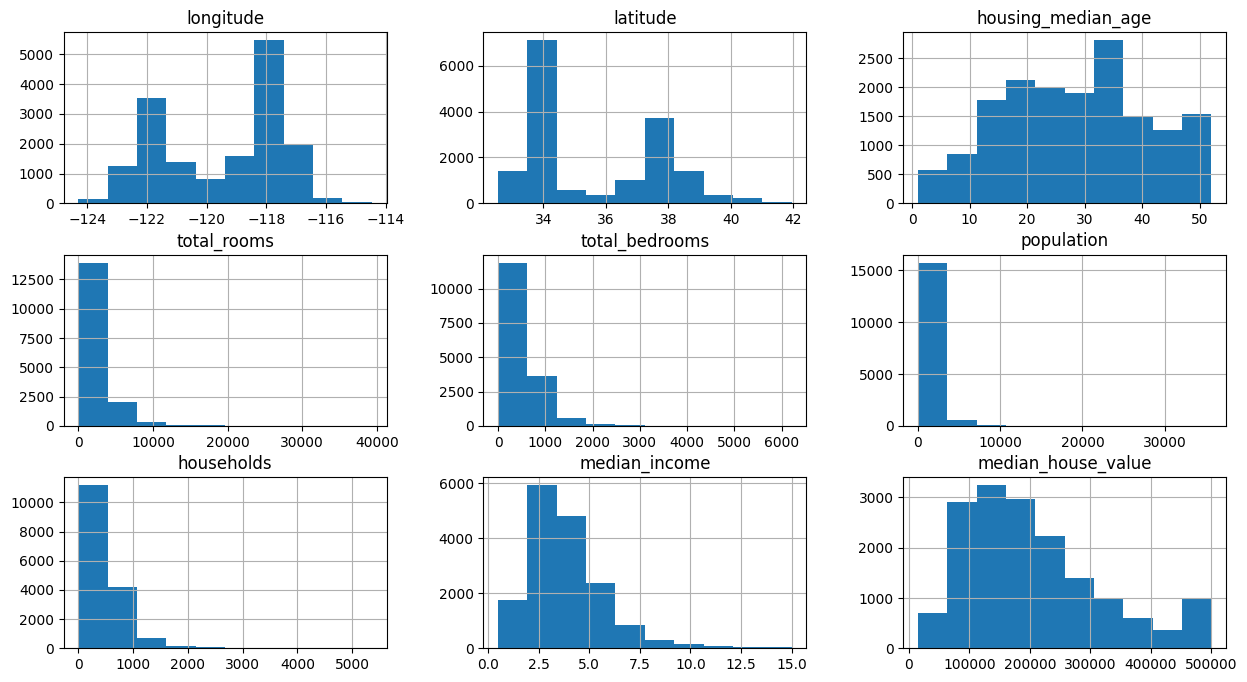

In [12]:
train_data.hist(figsize=(15,8))

In [13]:
train_data.corr(numeric_only=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925401,-0.111319,0.053137,0.076525,0.106200,0.062555,-0.012926,-0.040942
latitude,-0.925401,1.000000,0.015089,-0.040696,-0.070797,-0.112586,-0.075337,-0.081089,-0.147087
housing_median_age,-0.111319,0.015089,1.000000,-0.361984,-0.322008,-0.295301,-0.303190,-0.119752,0.099479
total_rooms,0.053137,-0.040696,-0.361984,1.000000,0.929930,0.855115,0.916923,0.195669,0.131512
total_bedrooms,0.076525,-0.070797,-0.322008,0.929930,1.000000,0.878399,0.978707,-0.011045,0.047004
population,0.106200,-0.112586,-0.295301,0.855115,0.878399,1.000000,0.908416,0.002808,-0.026955
households,0.062555,-0.075337,-0.303190,0.916923,0.978707,0.908416,1.000000,0.010388,0.062569
median_income,-0.012926,-0.081089,-0.119752,0.195669,-0.011045,0.002808,0.010388,1.000000,0.686535
median_house_value,-0.040942,-0.147087,0.099479,0.131512,0.047004,-0.026955,0.062569,0.686535,1.000000


<Axes: >

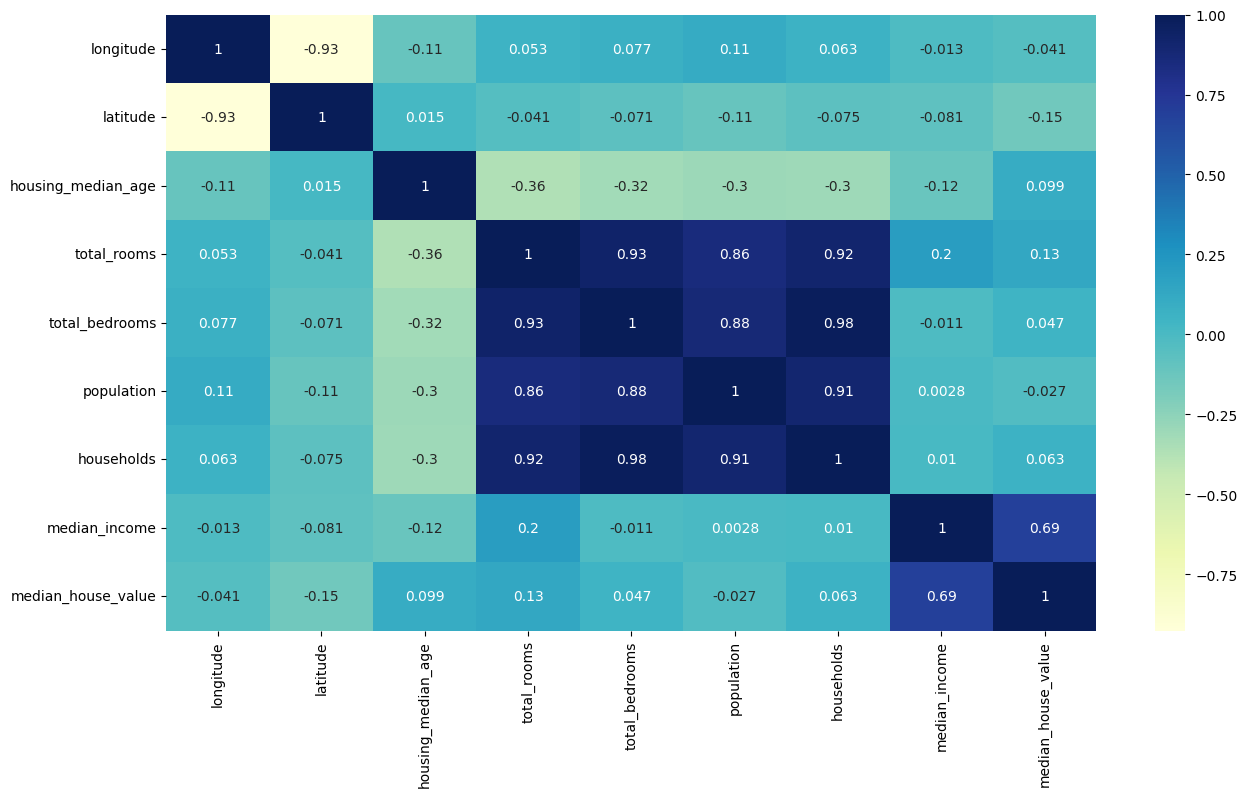

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

In [15]:
train_data["total_rooms"]=np.log(train_data["total_rooms"]+ 1)
train_data["total_bedrooms"]=np.log(train_data["total_bedrooms"]+ 1)
train_data["population"]=np.log(train_data["population"]+ 1)
train_data["households"]=np.log(train_data["households"]+ 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

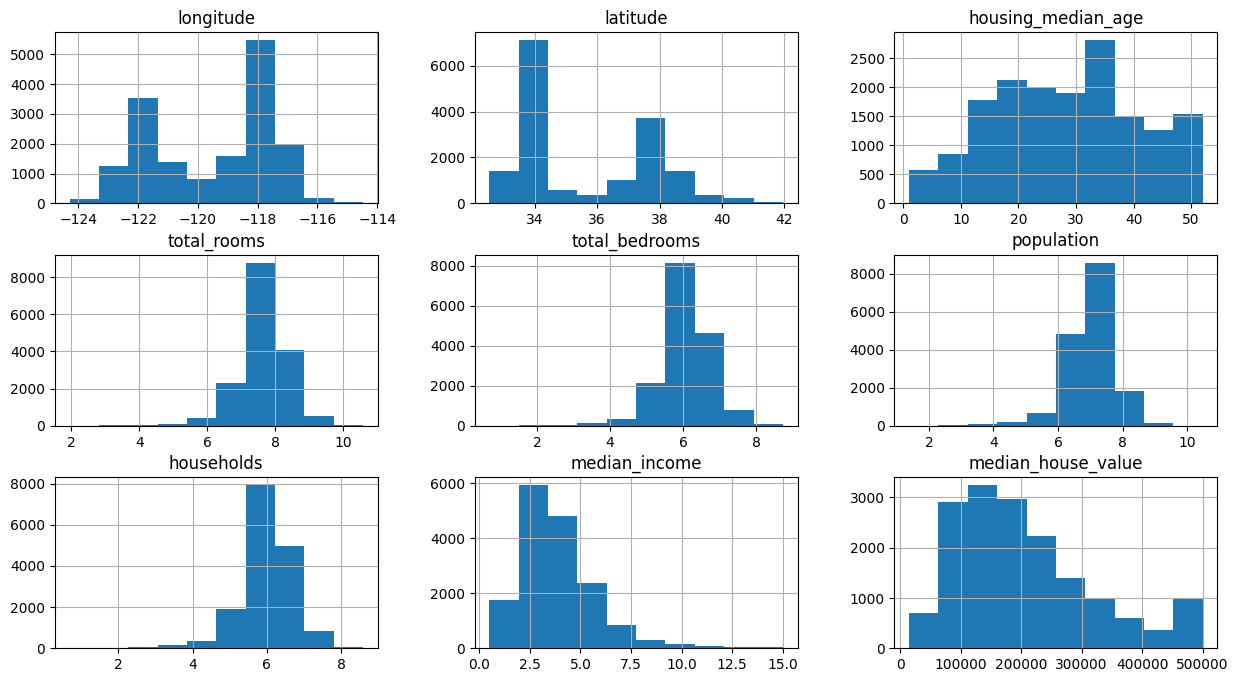

In [16]:
train_data.hist(figsize=(15,8))

In [17]:
train_data= train_data.join(pd.get_dummies(train_data.ocean_proximity,dtype=int)).drop(["ocean_proximity"], axis=1)

In [18]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14782,-117.09,32.57,17.0,6.098074,4.430817,5.880533,4.477337,5.1478,138900.0,0,0,0,0,1
3332,-122.60,38.90,23.0,5.680173,4.043051,4.532599,3.737670,2.9583,91700.0,0,1,0,0,0
16922,-122.33,37.58,27.0,8.545781,7.301148,7.831617,7.277939,3.4836,287900.0,0,0,0,0,1
4789,-118.32,34.02,47.0,7.407924,5.849325,7.021976,5.826000,2.0042,114200.0,1,0,0,0,0
104,-122.26,37.81,34.0,8.677951,7.557473,7.897296,7.489971,2.8406,335700.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7106,-118.01,33.90,26.0,7.995980,6.514713,7.412160,6.444131,4.6094,201000.0,1,0,0,0,0
12649,-121.47,38.51,52.0,3.044522,1.609438,4.317488,2.302585,3.6250,80000.0,0,1,0,0,0
8128,-118.16,33.79,25.0,8.605936,7.143618,8.010028,7.073270,3.2330,199100.0,0,0,0,0,1
13408,-117.48,34.09,32.0,7.409136,5.796058,7.025538,5.673323,3.1838,98600.0,0,1,0,0,0


<Axes: >

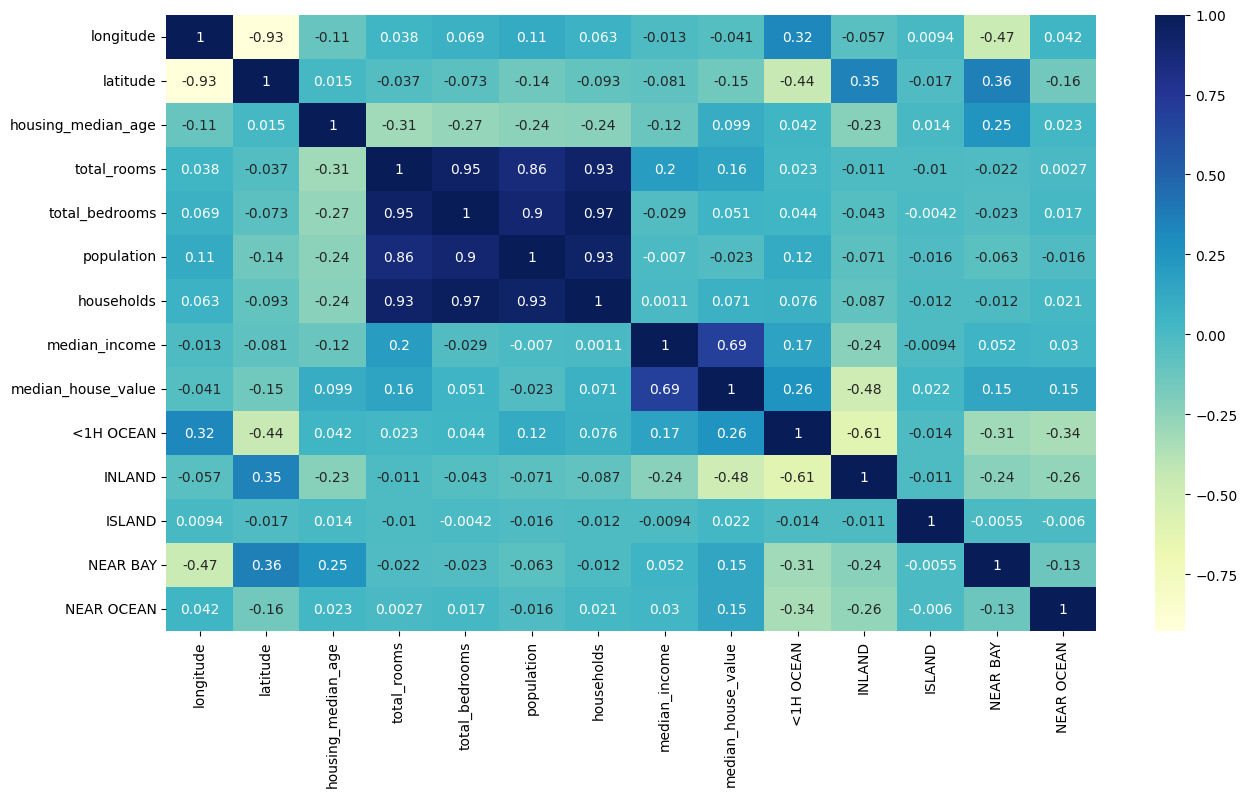

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

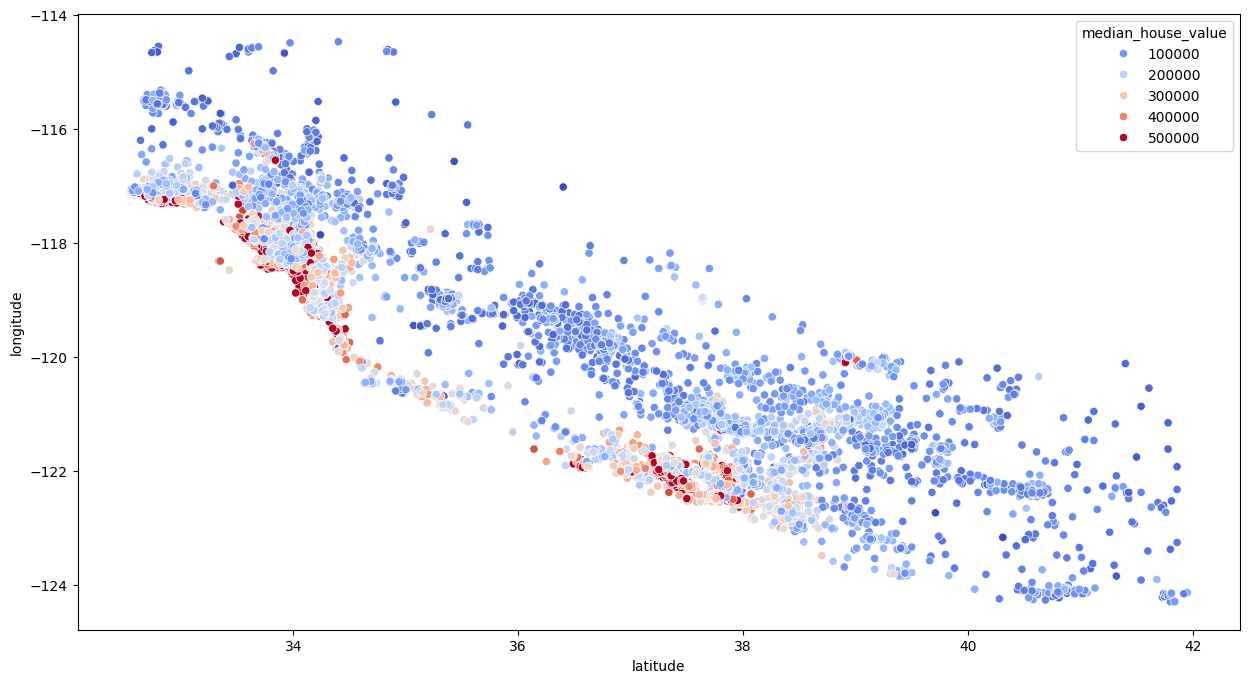

In [20]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [21]:
train_data["bedroom_ratio"]=train_data["total_bedrooms"]/ train_data["total_rooms"]
train_data["household_rooms"]= train_data["total_rooms"] / train_data["households"]

<Axes: >

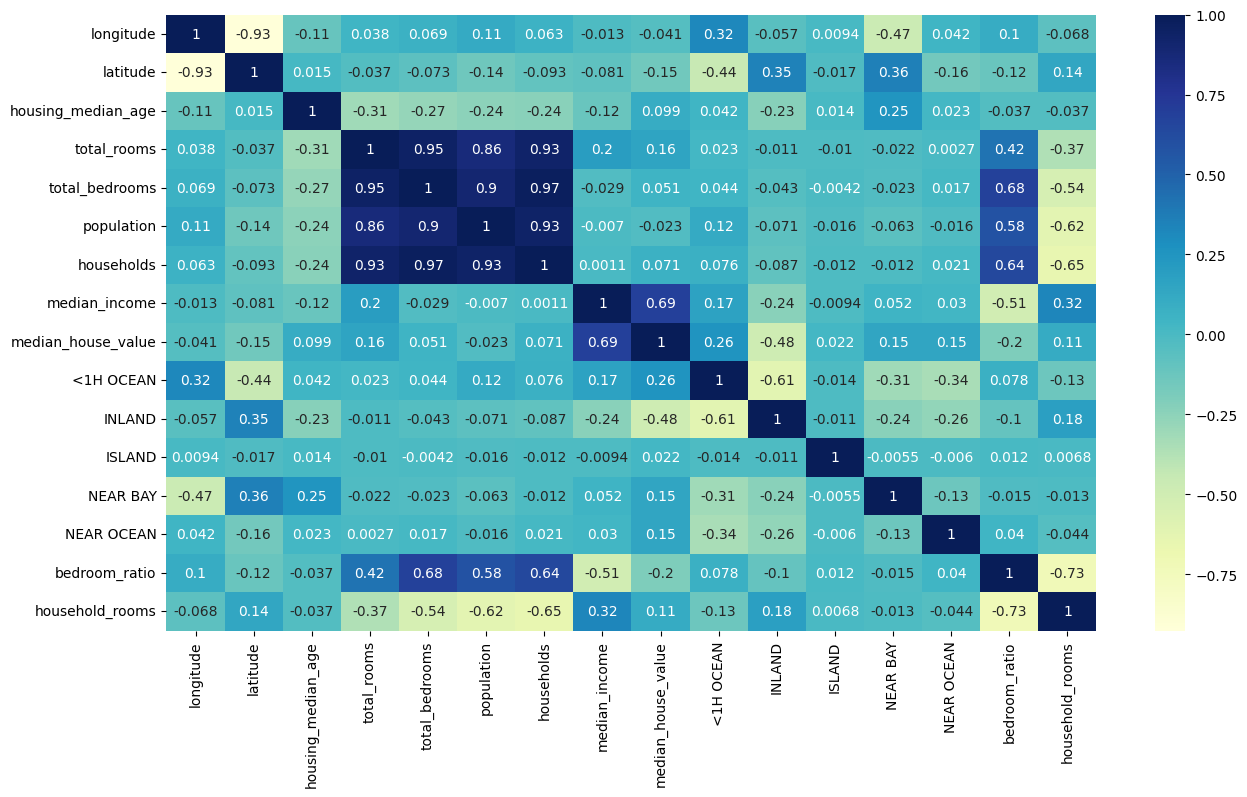

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


x_train, y_train= train_data.drop(["median_house_value"], axis=1), train_data["median_house_value"]
x_train_s=scaler.fit_transform(x_train)

reg=LinearRegression()
reg.fit(x_train_s,y_train)

LinearRegression()

In [24]:
test_data= x_test.join(y_test)

test_data["total_rooms"]=np.log(test_data["total_rooms"]+ 1)
test_data["total_bedrooms"]=np.log(test_data["total_bedrooms"]+ 1)
test_data["population"]=np.log(test_data["population"]+ 1)
test_data["households"]=np.log(test_data["households"]+ 1)

test_data= test_data.join(pd.get_dummies(test_data.ocean_proximity,dtype=int)).drop(["ocean_proximity"], axis=1)

test_data["bedroom_ratio"]=test_data["total_bedrooms"]/ test_data["total_rooms"]
test_data["household_rooms"]= test_data["total_rooms"] / test_data["households"]
x_test, y_test= test_data.drop(["median_house_value"], axis=1), test_data["median_house_value"]

In [25]:
x_test_s=scaler.transform(x_test)

In [26]:
reg.score(x_test_s,y_test)

0.6870297646631497

In [27]:
from sklearn.ensemble import RandomForestRegressor

forest= RandomForestRegressor()

forest.fit(x_train_s,y_train)

RandomForestRegressor()

In [28]:
forest.score(x_test_s,y_test)

0.8327606567298004

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid= {
    "n_estimators":[100,200,300],
    "min_samples_split":[2,4],
    "max_depth":[None,4,8]
}
grid_search= GridSearchCV(forest, param_grid, cv=5,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [30]:
best_forest=grid_search.best_estimator_


In [31]:
best_forest.score(x_test_s,y_test)

0.8333919732440381

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(x_train_s, y_train)

KNeighborsRegressor()

In [34]:
knn_regression_score = knn_regressor.score(x_test_s, y_test)
print("KNN Regression R^2 Score:", knn_regression_score)

KNN Regression R^2 Score: 0.7489287593093137


In [35]:
y_train_class = pd.cut(y_train, bins=3, labels=['Low', 'Medium', 'High'])
y_test_class = pd.cut(y_test, bins=3, labels=['Low', 'Medium', 'High'])


In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_s, y_train_class)


KNeighborsClassifier()

In [37]:
# Predict and evaluate
y_pred_class = knn_classifier.predict(x_test_s)
print("KNN Classification Accuracy:", accuracy_score(y_test_class, y_pred_class))
# print("Classification Report:\n", classification_report(y_test_class, y_pred_class))
# print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_class))


KNN Classification Accuracy: 0.7680450207976511


In [38]:
from sklearn.svm import SVR

In [39]:
svm_regressor = SVR(kernel='rbf')
svm_regressor.fit(x_train_s, y_train)

SVR()

In [40]:
svm_regression_score = svm_regressor.score(x_test_s, y_test)
print("SVM Regression R^2 Score:", svm_regression_score)



SVM Regression R^2 Score: -0.05701996142039101


In [41]:
from sklearn.svm import SVC

In [42]:
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_classifier.fit(x_train_s, y_train_class)

SVC()

In [43]:
y_pred_svm_class = svm_classifier.predict(x_test_s)
print("SVM Classification Accuracy:", accuracy_score(y_test_class, y_pred_svm_class))

SVM Classification Accuracy: 0.7969170540738928


In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [45]:
X = data.drop(['median_house_value', 'ocean_proximity'], axis=1)
y = data['median_house_value']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

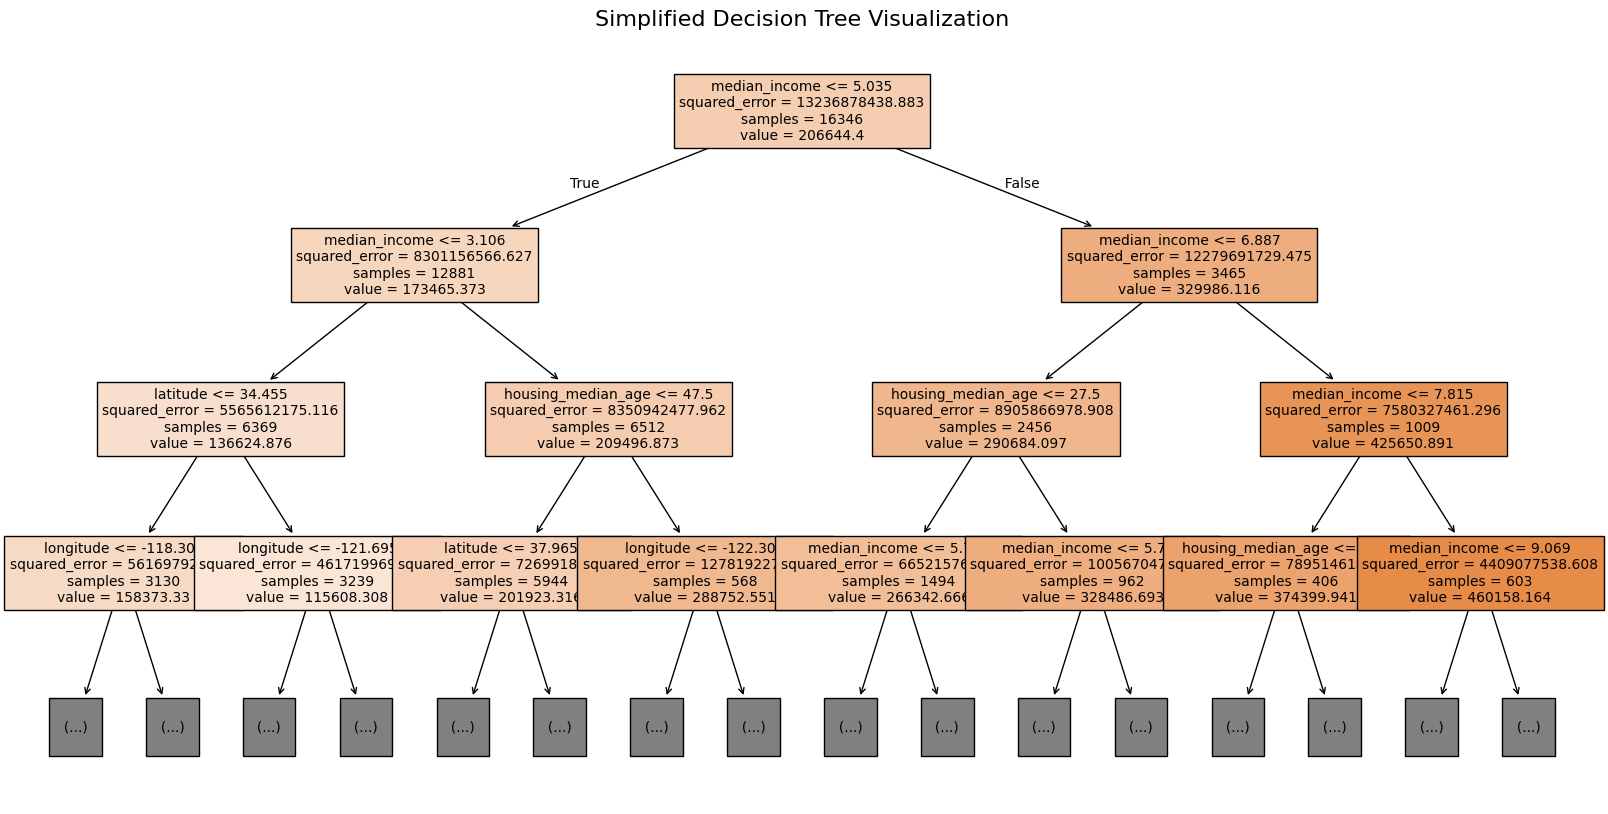

In [54]:
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X.columns, filled=True, fontsize=10, max_depth=3)
plt.title("Simplified Decision Tree Visualization", fontsize=16)
plt.show()


In [55]:
y_pred = decision_tree.predict(X_test)

In [56]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of the Decision Tree Regressor: {mse:.2f}")

Mean Squared Error of the Decision Tree Regressor: 4723808755.31
